In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('sergio smrithi data.csv')
df2 = pd.read_csv('tariq data2.csv')

combined_table = pd.concat([df2, df1])
combined_table.head()

,Motion,Military Aid (Israel),Humanitarian Aid (Gaza/Lebanon),Symbolic Resolutions,Campus Protest,"Relations, normalization, and ceasfire",Tommy Tuberville (R-AL),Katie Britt (R-AL),Lisa Murkowski (R-AK),Dan Sullivan (R-AK),...,Patty Murray (D-WA),Maria Cantwell (D-WA),Joe Manchin (D-WV),Shelley Capito (R-WV),Ron Johnson (R-WI),Tammy Baldwin (D-WI),John Barasso (R-WY),Cynthia Lummis (R-WY),George Helmy (D-NJ),JD Vance (R-OH)
0,"**excludable from dataset, as vote did not pe...",0.1,0.1,0.0,0.0,0.0,-0.5,-0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,-0.5,0.5,0.5,0.5,0,NaN
1,Senator Casey added as a sponsor of a bill to ...,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
2,SRES115. Bill to deny export license for Boein...,-0.6,0.0,-0.2,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1,NaN
3,SRES111. Bill would prevent exports of tank mu...,-0.5,0.0,-0.2,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1,NaN
4,SRES113. Bill would prevent the export of mort...,-0.6,0.0,-0.2,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1,NaN


In [3]:
#perform matrix transformations on df
def vote_data_transform(data):
    data.fillna(0, inplace=True)

    bill_matrix = data.iloc[:, 1:6]
    vote_matrix = data.iloc[:, 6:106]

    bill_matrix_transposed = bill_matrix.T

    result = np.matmul(bill_matrix_transposed, vote_matrix)
    return result


weighted_table = vote_data_transform(combined_table)
weighted_table.head()

,Tommy Tuberville (R-AL),Katie Britt (R-AL),Lisa Murkowski (R-AK),Dan Sullivan (R-AK),"Kyrsten Sinema (I-AZ, formerly D-AZ)",Mark Kelly (D-AZ),John Boozman (R-AR),Tom Cotton (R-AR),Alex Padilla (D-CA),Laphonza Butler (D-CA),...,Mark Warner (D-VA),Tim Kaine (D-VA),Patty Murray (D-WA),Maria Cantwell (D-WA),Joe Manchin (D-WV),Shelley Capito (R-WV),Ron Johnson (R-WI),Tammy Baldwin (D-WI),John Barasso (R-WY),Cynthia Lummis (R-WY)
Military Aid (Israel),1.95,3.20,1.95,3.40,1.65,1.65,2.05,3.25,1.65,1.85,...,1.65,-1.75,1.65,1.65,1.65,1.95,1.85,-0.05,3.40,3.30
Humanitarian Aid (Gaza/Lebanon),0.75,1.25,0.75,1.45,-0.85,-0.85,1.45,1.30,-0.85,-0.65,...,-1.60,-1.60,-1.60,-0.85,0.75,1.35,1.25,-0.85,0.65,0.75
Symbolic Resolutions,3.60,5.30,2.20,3.30,0.10,0.10,4.00,5.35,0.10,1.10,...,0.65,-0.85,-0.35,-0.20,0.10,4.15,2.80,-0.50,5.55,2.20
Campus Protest,1.50,0.60,0.60,0.60,0.00,0.00,0.60,0.60,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.60,0.60,0.00,1.50,0.60
"Relations, normalization, and ceasfire",0.45,3.15,0.45,1.20,0.00,0.00,1.20,3.00,0.00,0.00,...,0.15,0.00,0.00,0.00,0.00,2.55,1.20,0.00,2.55,0.45


In [4]:
weighted_transposed = weighted_table.transpose().reset_index()
weighted_transposed['index'] = weighted_transposed['index'].str.split('(').str[0]
weighted_transposed['index'] = weighted_transposed['index'].str.strip().str.replace(r'\s+', ' ', regex=True)
weighted_transposed

,index,Military Aid (Israel),Humanitarian Aid (Gaza/Lebanon),Symbolic Resolutions,Campus Protest,"Relations, normalization, and ceasfire"
0,Tommy Tuberville,1.95,0.75,3.60,1.5,0.45
1,Katie Britt,3.20,1.25,5.30,0.6,3.15
2,Lisa Murkowski,1.95,0.75,2.20,0.6,0.45
3,Dan Sullivan,3.40,1.45,3.30,0.6,1.20
4,Kyrsten Sinema,1.65,-0.85,0.10,0.0,0.00
...,...,...,...,...,...,...
95,Shelley Capito,1.95,1.35,4.15,0.6,2.55
96,Ron Johnson,1.85,1.25,2.80,0.6,1.20
97,Tammy Baldwin,-0.05,-0.85,-0.50,0.0,0.00
98,John Barasso,3.40,0.65,5.55,1.5,2.55


In [5]:
demographic_tab = pd.read_csv('demographic data senate1.csv')
demographic_tab.head()
demographic_tab.columns = demographic_tab.columns.str.strip()
demographic_tab['Senator Name'] = demographic_tab['Senator Name'].str.strip().str.replace(r'\s+', ' ', regex=True)


In [13]:
pd.set_option('display.max_rows', 10)
merged_senate = pd.merge(weighted_transposed, demographic_tab, left_on='index', right_on='Senator Name', how='inner')
merged_senate.head()


,index,Military Aid (Israel),Humanitarian Aid (Gaza/Lebanon),Symbolic Resolutions,Campus Protest,"Relations, normalization, and ceasfire",Senator Name,State,Party,Region,Gender,Age,First Inaugurated
0,Tommy Tuberville,1.95,0.75,3.6,1.5,0.45,Tommy Tuberville,AL,R,South,M,70,2021
1,Katie Britt,3.20,1.25,5.3,0.6,3.15,Katie Britt,AL,R,South,F,42,2023
2,Lisa Murkowski,1.95,0.75,2.2,0.6,0.45,Lisa Murkowski,AK,R,West,F,67,2002
3,Dan Sullivan,3.40,1.45,3.3,0.6,1.20,Dan Sullivan,AK,R,West,M,60,2015
4,Kyrsten Sinema,1.65,-0.85,0.1,0.0,0.00,Kyrsten Sinema,AZ,I,West,F,46,2019


In [82]:
filtered_democrat = merged_senate[merged_senate['Party'].isin(['D', 'I'])]
columns_to_average = filtered_democrat.iloc[:, 1:6]
category_avgsD = columns_to_average.mean()

category_avgsD_df = pd.DataFrame(category_avgsD).reset_index()
category_avgsD_df.columns = ['Bill Category', 'Average Democrat Vote Score']
category_avgsD_df

,Bill Category,Average Democrat Vote Score
0,Military Aid (Israel),0.390
1,Humanitarian Aid (Gaza/Lebanon),-1.110
2,Symbolic Resolutions,0.084
3,Campus Protest,0.018
4,"Relations, normalization, and ceasfire",0.084


In [81]:
filtered_republican = merged_senate[merged_senate['Party'].isin(['R'])]
columns_to_averageR = filtered_republican.iloc[:, 1:6]
category_avgsR = columns_to_averageR.mean()

category_avgsR_df = pd.DataFrame(category_avgsR).reset_index()
category_avgsR_df.columns = ['Bill Category', 'Average Republican Vote Score']
category_avgsR_df

,Bill Category,Average Republican Vote Score
0,Military Aid (Israel),2.612500
1,Humanitarian Aid (Gaza/Lebanon),1.115625
2,Symbolic Resolutions,3.821875
3,Campus Protest,0.787500
4,"Relations, normalization, and ceasfire",1.875000


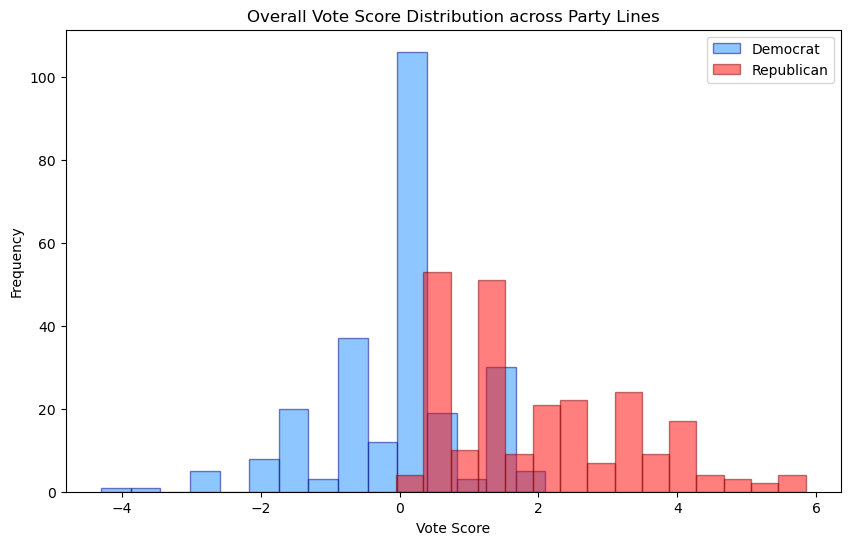

In [57]:
valuesD = filtered_democrat.iloc[:, 1:6].values.flatten()
valuesR = filtered_republican.iloc[:, 1:6].values.flatten()

plt.figure(figsize=(10, 6))
plt.hist(valuesD, bins=15, alpha=0.5, label='DataFrame 1', color='dodgerblue', edgecolor='navy')
plt.hist(valuesR, bins=15, alpha=0.5, label='DataFrame 2', color='red', edgecolor='maroon')
plt.xlabel('Vote Score')
plt.ylabel('Frequency')
plt.title('Overall Vote Score Distribution across Party Lines')
plt.legend(['Democrat', 'Republican'])

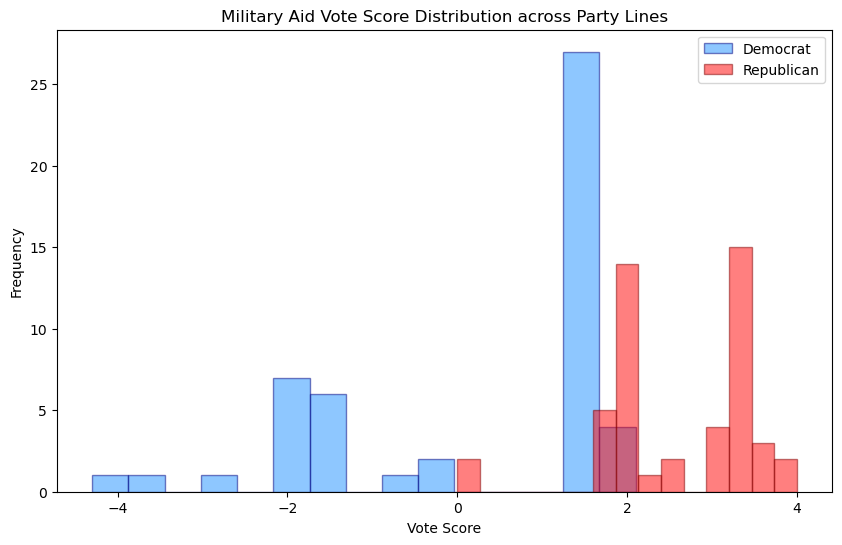

In [66]:
valuesD_military = filtered_democrat.iloc[:, 1]
valuesR_military = filtered_republican.iloc[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(valuesD_military, bins=15, alpha=0.5, label='DataFrame 1', color='dodgerblue', edgecolor='navy')
plt.hist(valuesR_military, bins=15, alpha=0.5, label='DataFrame 2', color='red', edgecolor='maroon')
plt.xlabel('Vote Score')
plt.ylabel('Frequency')
plt.title('Military Aid Vote Score Distribution across Party Lines')
plt.legend(['Democrat', 'Republican'])

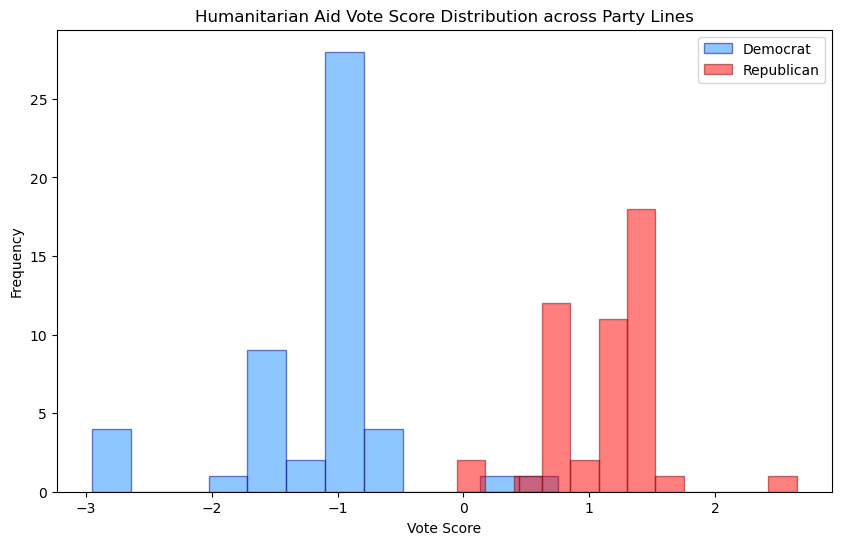

In [64]:
valuesD_humanitarian = filtered_democrat.iloc[:, 2]
valuesR_humanitarian = filtered_republican.iloc[:, 2]

plt.figure(figsize=(10, 6))
plt.hist(valuesD_humanitarian, bins=12, alpha=0.5, label='DataFrame 1', color='dodgerblue', edgecolor='navy')
plt.hist(valuesR_humanitarian, bins=12, alpha=0.5, label='DataFrame 2', color='red', edgecolor='maroon')
plt.xlabel('Vote Score')
plt.ylabel('Frequency')
plt.title('Humanitarian Aid Vote Score Distribution across Party Lines')
plt.legend(['Democrat', 'Republican'])

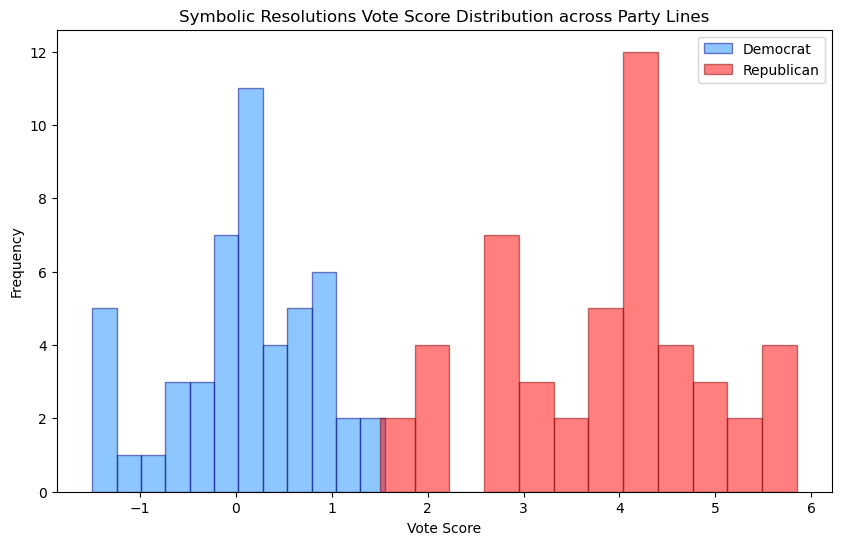

In [63]:
valuesD_resolutions = filtered_democrat.iloc[:, 3]
valuesR_resolutions = filtered_republican.iloc[:, 3]

plt.figure(figsize=(10, 6))
plt.hist(valuesD_resolutions, bins=12, alpha=0.5, label='DataFrame 1', color='dodgerblue', edgecolor='navy')
plt.hist(valuesR_resolutions, bins=12, alpha=0.5, label='DataFrame 2', color='red', edgecolor='maroon')
plt.xlabel('Vote Score')
plt.ylabel('Frequency')
plt.title('Symbolic Resolutions Vote Score Distribution across Party Lines')
plt.legend(['Democrat', 'Republican'])

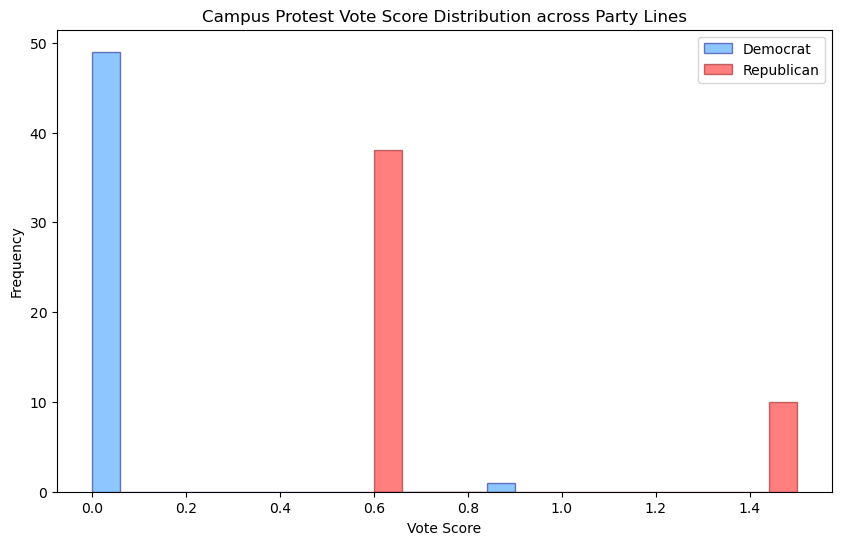

In [71]:
valuesD_campus = filtered_democrat.iloc[:, 4]
valuesR_campus = filtered_republican.iloc[:, 4]

plt.figure(figsize=(10, 6))
plt.hist(valuesD_campus, bins=15, alpha=0.5, label='DataFrame 1', color='dodgerblue', edgecolor='navy')
plt.hist(valuesR_campus, bins=15, alpha=0.5, label='DataFrame 2', color='red', edgecolor='maroon')
plt.xlabel('Vote Score')
plt.ylabel('Frequency')
plt.title('Campus Protest Vote Score Distribution across Party Lines')
plt.legend(['Democrat', 'Republican'])

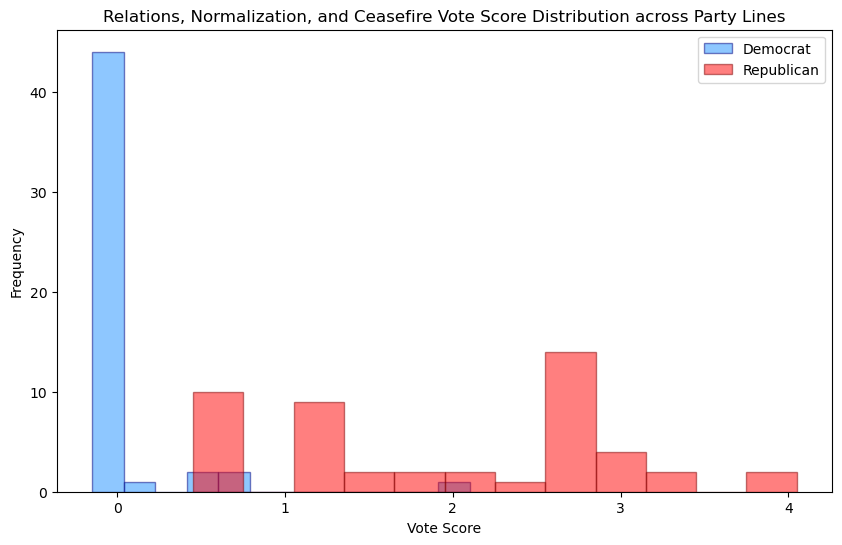

In [73]:
valuesD_relations = filtered_democrat.iloc[:, 5]
valuesR_relations = filtered_republican.iloc[:, 5]

plt.figure(figsize=(10, 6))
plt.hist(valuesD_relations, bins=12, alpha=0.5, label='DataFrame 1', color='dodgerblue', edgecolor='navy')
plt.hist(valuesR_relations, bins=12, alpha=0.5, label='DataFrame 2', color='red', edgecolor='maroon')
plt.xlabel('Vote Score')
plt.ylabel('Frequency')
plt.title('Relations, Normalization, and Ceasefire Vote Score Distribution across Party Lines')
plt.legend(['Democrat', 'Republican'])